# Head

In [11]:
import pandas as pd
from pathlib import Path
home = Path.home()

test = pd.read_csv(home / 'projects/TLDR/data/paper_html_10.1038/abs_annotation/test.tsv', sep='\t')
deepseek_v3 = pd.read_csv(home / 'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/deepseek_v3.txt',
                          sep='\t', header=None, names=['deepseek_v3'])
gemma3 = pd.read_csv(home / 'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/gemma3_TLDR.txt',
                          sep='\t', header=None, names=['gemma3'])
llama4 = pd.read_csv(home / 'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/llama4_TLDR.txt',
                          sep='\t', header=None, names=['llama4'])
qwq = pd.read_csv(home / 'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/qwq_TLDR.txt',
                          sep='\t', header=None, names=['qwq'])
qwen3 = pd.read_csv(home / 'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/qwen3_TLDR.txt',
                          sep='\t', header=None, names=['qwen3'])
df = test.join([deepseek_v3, qwen3, gemma3, llama4, qwq])

for index in pd.read_csv(home / "projects/TLDR/description/invalid_entry_in_test.txt", sep='\t', header=None).values.flatten().tolist():
    df = df.drop(index-2)  # Adjusting for zero-based index
df

,abs_doi,paper_id,abstract,annotation,deepseek_v3,qwen3,gemma3,llama4,qwq
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,This study analyzes mitochondrial DNA diversit...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,This study fine-maps a milk production QTL on ...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study reports high levels of both synteni...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies quantitative trait loci ...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...
...,...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes engineered orthogonal IL-...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study identifies hybrid peptides formed b...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study demonstrates a multiplex genome-edi...,This work describes a multiplex genome editing...,This work reports on a cell engineering strate...,This study identifies a strategy for broad imm...,This study describes a dual strategy to engine...


In [20]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [21]:
import pickle
print("Loading doi_mag_pid_dict...")
with open(home / "projects/TLDR/data/doi_mag_pid_dict.pkl", "rb") as f:
    doi_mag_pid_dict = pickle.load(f)
    print("doi_mag_pid_dict loaded.")

df['mag_pid'] = df['abs_doi'].map(doi_mag_pid_dict)
df = df.dropna(subset=['mag_pid'])
df.loc[:, 'mag_pid'] = df['mag_pid'].parallel_apply(lambda x: x.split(';')[0] if isinstance(x, str) else x)
df.loc[:, 'mag_pid'] = df['mag_pid'].astype(int)
display(df)

Loading doi_mag_pid_dict...
doi_mag_pid_dict loaded.


,abs_doi,paper_id,abstract,annotation,deepseek_v3,qwen3,gemma3,llama4,qwq,mag_pid,title
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,This study analyzes mitochondrial DNA diversit...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,2005395185,Evidence for two independent domestications of...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,2110049233,The Origin of the Domestic Pig: Independent Do...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,This study fine-maps a milk production QTL on ...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,2082900742,Fine-mapping of quantitative trait loci by ide...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study reports high levels of both synteni...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,2103106090,Extensive Genome-wide Linkage Disequilibrium i...
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies quantitative trait loci ...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,2045457895,Genetic mapping of quantitative trait loci for...
...,...,...,...,...,...,...,...,...,...,...,...
34770,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,2137227986,Expansion of Human Regulatory T-Cells From Pat...
34771,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes engineered orthogonal IL-...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,2789780246,Selective targeting of engineered T cells usin...
34772,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study identifies hybrid peptides formed b...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,2266478788,Pathogenic CD4 T cells in type 1 diabetes reco...
34773,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study demonstrates a multiplex genome-edi...,This work describes a multiplex genome editing...,This work reports on a cell engineering strate...,T

In [22]:
MAG_paper_df = pd.read_parquet('/home/lyuzhuoqi/projects/TLDR/data/MAG_paper.parquet')
display(MAG_paper_df)
df = df.merge(MAG_paper_df[['VenueID', 'Year']], left_on='mag_pid', right_index=True, how='inner')
df.rename(columns={'VenueID': 'mag_vid', 'Year': 'year'}, inplace=True)
display(df)

,Year,DocType,VenueID
PaperID,,,
3206416479,1800,Journal,2360835
3205676634,1800,Journal,148921865
3092044961,1800,Journal,3006142753
3092547797,1800,Journal,3006142753
2895498877,1800,Journal,118082279
...,...,...,...
3212273925,2022,Journal,44455300
3175031963,2022,Journal,2764413287
3198241111,2022,Journal,67716761


,abs_doi,paper_id,abstract,annotation,deepseek_v3,qwen3,gemma3,llama4,qwq,mag_pid,title,mag_vid,year
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,This study analyzes mitochondrial DNA diversit...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,2005395185,Evidence for two independent domestications of...,125754415,1994
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,2110049233,The Origin of the Domestic Pig: Independent Do...,65932378,2000
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,This study fine-maps a milk production QTL on ...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,2082900742,Fine-mapping of quantitative trait loci by ide...,125754415,1999
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study reports high levels of both synteni...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,2103106090,Extensive Genome-wide Linkage Disequilibrium i...,43092948,2000
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies quantitative trait loci ...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,2045457895,Genetic mapping of quantitative trait loci for...,3880285,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34770,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,2137227986,Expansion of Human Regulatory T-Cells From Pat...,129060628,2009
34771,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes engineered orthogonal IL-...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,2789780246,Selective targeting of engineered T cells usin...,3880285,2018
34772,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study identifies hybrid peptides formed b...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,2266478788,Pathogenic CD4 T cells in type 1 diabetes reco...,3880285,2016
34773,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study demonst

In [23]:
label_df = pd.read_parquet(home / 'projects/TLDR/data/cluster_df.parquet')
label_df

,Scopus_label,movMF_label,movMF_distance,x_val,y_val,kmeans_label,kmeans_distance,skm_label,skm_distance,spectral_label,n2v_kmeans_label,cm_kmeans_label,gnn_kmeans_label,bert_kmeans_label
202381698,Multidisciplinary,22,0.445886,-67.928200,15.572327,17,0.628846,20,0.444711,24,3,21,0,0
137773608,Multidisciplinary,22,0.590942,-68.405334,-55.633186,17,0.735654,20,0.559494,24,20,21,0,3
125754415,Multidisciplinary,22,0.574571,-68.448853,-55.613579,17,0.705024,20,0.550081,24,20,21,0,0
3880285,Multidisciplinary,23,0.618842,-68.407288,-55.634430,8,0.724859,17,0.610582,24,20,21,0,3
111155417,Chemistry,23,0.220853,-54.506985,-61.217068,11,0.495787,12,0.198758,14,4,24,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764485818,Medicine,21,0.268070,-28.969574,34.819569,18,0.542531,14,0.251015,8,18,1,19,1
83454320,Arts and Humanities,25,0.034777,78.609909,31.736822,13,0.251599,3,0.056642,21,5,1,14,1
16507453,Arts and Humanities,6,0.113656,89.206772,17.625090,13,0.307089,3,0.128660,21,5,1,14,1
121509672,Agricultural and Biological Sciences,5,0.179111,-36.757057,-0.591017,21,0.430040,16,0.207435,10,5,1,10,1


In [24]:
df = df.merge(label_df[['kmeans_label', 'Scopus_label']], left_on='mag_vid', right_index=True, how='inner')
df.rename(columns={'kmeans_label': 'p2v_label', 'Scopus_label': 'scopus_label'}, inplace=True)
df

,abs_doi,paper_id,abstract,annotation,deepseek_v3,qwen3,gemma3,llama4,qwq,mag_pid,title,mag_vid,year,p2v_label,scopus_label
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,This study analyzes mitochondrial DNA diversit...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,2005395185,Evidence for two independent domestications of...,125754415,1994,17,Multidisciplinary
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,2110049233,The Origin of the Domestic Pig: Independent Do...,65932378,2000,17,"Biochemistry, Genetics and Molecular Biology"
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,This study fine-maps a milk production QTL on ...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,2082900742,Fine-mapping of quantitative trait loci by ide...,125754415,1999,17,Multidisciplinary
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study reports high levels of both synteni...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,2103106090,Extensive Genome-wide Linkage Disequilibrium i...,43092948,2000,17,"Biochemistry, Genetics and Molecular Biology"
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies quantitative trait loci ...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,2045457895,Genetic mapping of quantitative trait loci for...,3880285,1994,8,Multidisciplinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34770,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,2137227986,Expansion of Human Regulatory T-Cells From Pat...,129060628,2009,17,Medicine
34771,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes engineered orthogonal IL-...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,2789780246,Selective targeting of engineered T cells usin...,3880285,2018,8,Multidisciplinary
34772,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study identifies hybrid peptides formed b...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,226647

In [7]:
df['p2v_label'].value_counts()

p2v_label
17    18439
8      9625
6      1457
7      1028
4       627
9       611
11      580
22      404
18      363
21      319
12      292
20      121
1        60
3        49
14       32
5        25
24       21
16       21
15       17
23       16
2        16
0        10
19        6
13        5
25        2
Name: count, dtype: int64

In [8]:
df['scopus_label'].value_counts()

scopus_label
Multidisciplinary                               15639
Medicine                                         5262
Immunology and Microbiology                      4146
Biochemistry, Genetics and Molecular Biology     4116
Chemistry                                        1285
Neuroscience                                     1211
Agricultural and Biological Sciences              704
Social Sciences                                   608
Earth and Planetary Sciences                      235
Materials Science                                 179
Psychology                                        156
Physics and Astronomy                             139
Pharmacology, Toxicology and Pharmaceutics        128
Environmental Science                             119
Energy                                             39
Mathematics                                        30
Engineering                                        28
Computer Science                                   24
Nursing        

# Predict subject

## 10-fold cv

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

text_features = ['abstract', 'annotation', 'deepseek_v3', 'qwen3','gemma3', 'llama4', 'qwq']
y = (df['p2v_label'] == 17).astype(int)  # 17为1，否则为0

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1']

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
    X = vectorizer.transform(X_text)
    clf = MultinomialNB()
    scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=1)
    res = {
        'feature': feat,
        'accuracy_mean': scores['test_accuracy'].mean(),
        'accuracy_std': scores['test_accuracy'].std(),
        'precision_mean': scores['test_precision'].mean(),
        'precision_std': scores['test_precision'].std(),
        'recall_mean': scores['test_recall'].mean(),
        'recall_std': scores['test_recall'].std(),
        'f1_mean': scores['test_f1'].mean(),
        'f1_std': scores['test_f1'].std(),
    }
    print(
        f"Feature: {feat} | "
        f"Acc: {res['accuracy_mean']:.4f}±{res['accuracy_std']:.4f} | "
        f"Precision: {res['precision_mean']:.4f}±{res['precision_std']:.4f} | "
        f"Recall: {res['recall_mean']:.4f}±{res['recall_std']:.4f} | "
        f"F1: {res['f1_mean']:.4f}±{res['f1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: abstract


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:01<00:00, 22929.86it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.6s finished


Feature: abstract | Acc: 0.6962±0.0039 | Precision: 0.6544±0.0022 | Recall: 0.9270±0.0074 | F1: 0.7672±0.0035
Processing feature: annotation


Vectorizing documents: 100%|███████████████████████████████████████████| 34146/34146 [00:00<00:00, 146033.20it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished


Feature: annotation | Acc: 0.6411±0.0043 | Precision: 0.6133±0.0028 | Recall: 0.9076±0.0078 | F1: 0.7320±0.0036
Processing feature: deepseek_v3


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:00<00:00, 80065.65it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished


Feature: deepseek_v3 | Acc: 0.6624±0.0043 | Precision: 0.6311±0.0031 | Recall: 0.9023±0.0053 | F1: 0.7427±0.0033
Processing feature: qwen3


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:00<00:00, 49284.88it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


Feature: qwen3 | Acc: 0.6613±0.0048 | Precision: 0.6301±0.0033 | Recall: 0.9025±0.0070 | F1: 0.7421±0.0038
Processing feature: gemma3


Vectorizing documents: 100%|███████████████████████████████████████████| 34146/34146 [00:00<00:00, 126225.03it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


Feature: gemma3 | Acc: 0.6623±0.0048 | Precision: 0.6313±0.0031 | Recall: 0.9008±0.0059 | F1: 0.7423±0.0038
Processing feature: llama4


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:00<00:00, 61864.22it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


Feature: llama4 | Acc: 0.6486±0.0048 | Precision: 0.6202±0.0033 | Recall: 0.9010±0.0069 | F1: 0.7347±0.0037
Processing feature: qwq


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:00<00:00, 44637.83it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


Feature: qwq | Acc: 0.6648±0.0046 | Precision: 0.6342±0.0034 | Recall: 0.8961±0.0052 | F1: 0.7428±0.0033


,feature,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std
0,abstract,0.696246,0.003894,0.654427,0.002232,0.927002,0.007353,0.767215,0.003539
1,annotation,0.641100,0.004256,0.613316,0.002769,0.907641,0.007798,0.731988,0.003620
2,deepseek_v3,0.662391,0.004315,0.631082,0.003056,0.902272,0.005305,0.742689,0.003252
3,qwen3,0.661279,0.004785,0.630125,0.003289,0.902543,0.007023,0.742113,0.003803
4,gemma3,0.662333,0.004801,0.631307,0.003140,0.900754,0.005926,0.742332,0.003800
5,llama4,0.648627,0.004779,0.620244,0.003254,0.900970,0.006872,0.734694,0.003712
6,qwq,0.664822,0.004560,0.634235,0.003418,0.896144,0.005219,0.742769,0.003291


## no cv

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
# 二分类标签：是否为17
y = (df['p2v_label'] == 17).astype(int)  # 17为1，否则为0

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    X_train, X_test, y_train, y_test = train_test_split(
        X_text, y, test_size=0.1, random_state=42, stratify=y
    )

    vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    clf = MultinomialNB()
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)

    res = {
        'feature': feat,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['accuracy']:.4f} | "
        f"Precision: {res['precision']:.4f} | "
        f"Recall: {res['recall']:.4f} | "
        f"F1: {res['f1']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: abstract


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 21465.83it/s]


Feature: abstract | Accuracy: 0.6972 | Precision: 0.6540 | Recall: 0.9328 | F1: 0.7689
Processing feature: annotation


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 137783.39it/s]


Feature: annotation | Accuracy: 0.6442 | Precision: 0.6150 | Recall: 0.9121 | F1: 0.7347
Processing feature: deepseek_v3


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 73381.46it/s]


Feature: deepseek_v3 | Accuracy: 0.6656 | Precision: 0.6333 | Recall: 0.9046 | F1: 0.7450
Processing feature: gemma3


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 110159.96it/s]


Feature: gemma3 | Accuracy: 0.6723 | Precision: 0.6389 | Recall: 0.9040 | F1: 0.7487
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 84019.43it/s]


Feature: llama4 | Accuracy: 0.6624 | Precision: 0.6299 | Recall: 0.9084 | F1: 0.7439
Processing feature: qwq


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 44519.71it/s]

Feature: qwq | Accuracy: 0.6685 | Precision: 0.6364 | Recall: 0.9008 | F1: 0.7458


,feature,accuracy,precision,recall,f1
0,abstract,0.697218,0.653992,0.932755,0.768887
1,annotation,0.644217,0.614991,0.912148,0.734658
2,deepseek_v3,0.665593,0.633257,0.904555,0.744975
3,gemma3,0.672328,0.638942,0.904013,0.748709
4,llama4,0.662372,0.629936,0.908351,0.743948
5,qwq,0.668521,0.636398,0.900759,0.745846


# Predict year

In [9]:
df['year'].describe()

count    34146.000000
mean      2006.680724
std          9.105688
min       1887.000000
25%       2001.000000
50%       2007.000000
75%       2014.000000
max       2022.000000
Name: year, dtype: float64

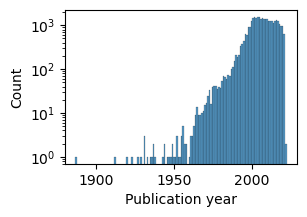

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 2))
sns.histplot(df, x='year', stat='count', discrete=True)
plt.xlabel('Publication year')
plt.yscale('log')
plt.ylabel('Count')
plt.show()

## 10-fold cv

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

# 指标: Accuracy, Precision, Recall, F1
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
y = (df['year'] >= 2008).astype(int)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    vectorizer = ProgressHashingVectorizer(n_features=2**20, stop_words='english', alternate_sign=False)
    X = vectorizer.transform(X_text)
    model = MultinomialNB()
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=1, return_train_score=False)
    res = {
        'feature': feat,
        'Accuracy_mean': scores['test_Accuracy'].mean(),
        'Accuracy_std': scores['test_Accuracy'].std(),
        'Precision_mean': scores['test_Precision'].mean(),
        'Precision_std': scores['test_Precision'].std(),
        'Recall_mean': scores['test_Recall'].mean(),
        'Recall_std': scores['test_Recall'].std(),
        'F1_mean': scores['test_F1'].mean(),
        'F1_std': scores['test_F1'].std(),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['Accuracy_mean']:.4f}±{res['Accuracy_std']:.4f} | "
        f"F1: {res['F1_mean']:.4f}±{res['F1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
display(results_df)

Processing feature: abstract


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:01<00:00, 20368.95it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.4s finished


Feature: abstract | Accuracy: 0.7542±0.0080 | F1: 0.7063±0.0094
Processing feature: annotation


Vectorizing documents: 100%|███████████████████████████████████████████| 34146/34146 [00:00<00:00, 133230.67it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    1.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished


Feature: annotation | Accuracy: 0.7161±0.0090 | F1: 0.6678±0.0120
Processing feature: deepseek_v3


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:00<00:00, 72311.64it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


Feature: deepseek_v3 | Accuracy: 0.7172±0.0093 | F1: 0.6544±0.0113
Processing feature: gemma3


Vectorizing documents: 100%|███████████████████████████████████████████| 34146/34146 [00:00<00:00, 112990.21it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


Feature: gemma3 | Accuracy: 0.7114±0.0076 | F1: 0.6574±0.0114
Processing feature: llama4


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:00<00:00, 56922.13it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


Feature: llama4 | Accuracy: 0.7082±0.0107 | F1: 0.6682±0.0141
Processing feature: qwq


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:00<00:00, 41747.87it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.2s


Feature: qwq | Accuracy: 0.7116±0.0098 | F1: 0.6457±0.0125


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


,feature,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1_mean,F1_std
0,abstract,0.754203,0.008020,0.836492,0.011048,0.611367,0.014414,0.706276,0.009402
1,annotation,0.716131,0.009039,0.768938,0.013663,0.590483,0.016425,0.667834,0.011960
2,deepseek_v3,0.717215,0.009269,0.799932,0.011445,0.553913,0.015737,0.654393,0.011265
3,gemma3,0.711416,0.007554,0.771602,0.010839,0.573048,0.019053,0.657395,0.011420
4,llama4,0.708195,0.010678,0.741881,0.013607,0.607991,0.017708,0.668183,0.014121
5,qwq,0.711563,0.009785,0.794972,0.012332,0.543872,0.016115,0.645722,0.012464


## no cv

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
y = df['year'].astype(int)  # 年份作为连续变量回归

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    X_train, X_test, y_train, y_test = train_test_split(
        X_text, y, test_size=0.1, random_state=42
    )

    vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    model = Ridge(alpha=1.0)
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    res = {
        'feature': feat,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
    }
    print(
        f"Feature: {feat} | "
        f"MAE: {res['MAE']:.4f} | "
        f"R2: {res['R2']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: abstract


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 22020.20it/s]


Feature: abstract | MAE: 4.2865 | R2: 0.5755
Processing feature: annotation


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 130228.28it/s]


Feature: annotation | MAE: 5.5461 | R2: 0.3061
Processing feature: deepseek_v3


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 77554.96it/s]


Feature: deepseek_v3 | MAE: 5.0521 | R2: 0.4281
Processing feature: gemma3


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 120217.45it/s]


Feature: gemma3 | MAE: 5.5035 | R2: 0.3244
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 54197.36it/s]


Feature: llama4 | MAE: 5.5231 | R2: 0.3139
Processing feature: qwq


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 44297.08it/s]


Feature: qwq | MAE: 5.0755 | R2: 0.4131


,feature,MAE,MSE,R2
0,abstract,4.286524,34.042876,0.575475
1,annotation,5.546063,55.646234,0.306074
2,deepseek_v3,5.052078,45.857851,0.428139
3,gemma3,5.503463,54.177417,0.324391
4,llama4,5.523119,55.020432,0.313878
5,qwq,5.075490,47.060866,0.413137


# Predict title

In [14]:
import pandas as pd
from sqlalchemy import create_engine
from tqdm import tqdm

MYSQL_HOST = '144.214.39.113'
MYSQL_USER = 'key'
MYSQL_PASS = 'Keydge11'
MYSQL_DB = 'keydge'

engine = create_engine(f'mysql+pymysql://{MYSQL_USER}:{MYSQL_PASS}@{MYSQL_HOST}/{MYSQL_DB}?charset=utf8mb4')

paper_ids = df['paper_id'].unique().tolist()
BATCH_SIZE = 500  # 每批查多少条，可调大或调小

results = []
# 用tqdm显示批次进度和预计完成时间
for i in tqdm(range(0, len(paper_ids), BATCH_SIZE), desc="Querying titles", unit="batch"):
    batch = paper_ids[i:i+BATCH_SIZE]
    id_str = ','.join(str(int(pid)) for pid in batch)
    sql = f"SELECT paper_id, title FROM paper_bib WHERE paper_id IN ({id_str})"
    batch_df = pd.read_sql(sql, engine)
    results.append(batch_df)

# 合并所有批次的查询结果
paper_title_df = pd.concat(results, ignore_index=True)
display(paper_title_df)

Querying titles: 100%|████████████████████████████████████████████████████████| 58/58 [00:01<00:00, 31.91batch/s]


,paper_id,title
0,1353153,Efficient Generation of a Hepatitis B Virus Cy...
1,1634910,"Structure of Hjc, a Holliday junction resolvas..."
2,1655469,From Complete Genomes to Measures of Substitut...
3,1778349,Regulation of the Proinflammatory Effects of F...
4,2550721,Differential requirement for p19ARF in the p53...
...,...,...
28576,130505215,Genome surveillance by HUSH-mediated silencing...
28577,130830512,Disrupting the LINC complex by AAV mediated ge...
28578,134721303,Future phytoplankton diversity in a changing c...
28579,135317206,Complete loss of H3K9 methylation dissolves mo...


In [15]:
df = df.merge(paper_title_df, on='paper_id', how='left')
display(df)

,abs_doi,paper_id,abstract,annotation,deepseek_v3,qwen3,gemma3,llama4,qwq,mag_pid,title
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,This study analyzes mitochondrial DNA diversit...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,2005395185,Evidence for two independent domestications of...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,2110049233,The Origin of the Domestic Pig: Independent Do...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,This study fine-maps a milk production QTL on ...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,2082900742,Fine-mapping of quantitative trait loci by ide...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study reports high levels of both synteni...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,2103106090,Extensive Genome-wide Linkage Disequilibrium i...
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies quantitative trait loci ...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,2045457895,Genetic mapping of quantitative trait loci for...
...,...,...,...,...,...,...,...,...,...,...,...
34770,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,2137227986,Expansion of Human Regulatory T-Cells From Pat...
34771,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes engineered orthogonal IL-...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,2789780246,Selective targeting of engineered T cells usin...
34772,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study identifies hybrid peptides formed b...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,2266478788,Pathogenic CD4 T cells in type 1 diabetes reco...
34773,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study demonstrates a multiplex genome-edi...,This work describes a multiplex genome editing...,This work reports on a cell engineering strate...,T

In [16]:
import pandas as pd
import numpy as np
from tqdm import tqdm

np.random.seed(42)  # 保证可复现
pos_samples = df[['abstract', 'annotation', 'deepseek_v3', 'qwen3', 'gemma3', 'llama4', 'qwq', 'title']].copy()
pos_samples["title_paired"] = True

neg_samples = []
for idx, row in tqdm(df.iterrows(), total=len(df), desc="生成负样本"):
    # 找到paper_id不同于本行的所有title
    candidates = df[df['paper_id'] != row['paper_id']]['title'].values
    fake_title = np.random.choice(candidates)
    fake_row = row[['abstract', 'annotation', 'deepseek_v3', 'qwen3', 'gemma3', 'llama4', 'qwq', 'title']].copy()
    fake_row["title"] = fake_title
    fake_row["title_paired"] = False
    neg_samples.append(fake_row)

neg_samples_df = pd.DataFrame(neg_samples)
# 合并正负样本
df_pair_title = pd.concat([pos_samples, neg_samples_df], ignore_index=True)
# 可选：打乱顺序
df_pair_title = df_pair_title.sample(frac=1, random_state=42).reset_index(drop=True)

# 展示
display(df_pair_title)

生成负样本: 100%|█████████████████████████████████████████████████████████| 34775/34775 [04:09<00:00, 139.41it/s]


,abstract,annotation,deepseek_v3,qwen3,gemma3,llama4,qwq,title,title_paired
0,OBJECTIVE—Rapamycin is an immunosuppressive dr...,This paper shows that rapamycin monotherapy in...,This study demonstrates that rapamycin monothe...,This study demonstrates that rapamycin enhance...,"This paper demonstrates in humans, that rapamy...",These studies demonstrate that rapamycin can e...,This study demonstrates that rapamycin enhance...,Rapamycin Monotherapy in Patients With Type 1 ...,True
1,Severe combined immunodeficiency–X1 (SCID-X1) ...,Proof that gene therapy directed at stem cells...,This study reports the first successful gene t...,This clinical study demonstrates that gene the...,This report describes the first successful gen...,This study demonstrates that gene therapy can ...,This study demonstrates the first successful g...,Magnetic Vortex Core Observation in Circular D...,False
2,"OBJECTIVE Resveratrol, a natural polyphenolic ...",This paper establishes the requirement for AMP...,This study demonstrates that the metabolic ben...,"This study demonstrates that AMPK, not Sirt1, ...","This paper demonstrates that AMPK, not Sirt1, ...",These studies show that AMPK is required for t...,This study demonstrates that AMPK is the prima...,fgf20 Is Essential for Initiating Zebrafish Fi...,False
3,Shiga toxin and other toxins of this family ca...,This article describes the discovery of a tran...,This study demonstrates that the Shiga toxin B...,This study demonstrates that Shiga toxin B-fra...,This work establishes a direct pathway for Shi...,These studies demonstrate that Shiga toxin is ...,Shiga toxin B-fragment bypasses late endosomes...,Glial reduction in the subgenual prefrontal co...,False
4,Using fluorescence in situ hybridization we sh...,Introduction of the concept of radial locus po...,This study provides early evidence for the non...,This study reveals chromosome-specific differe...,This study demonstrates that chromosome territ...,This work demonstrates that chromosome 18 and ...,This study uses fluorescence in situ hybridiza...,Survival and cure of acute myeloid leukaemia i...,False
...,...,...,...,...,...,...,...,...,...
69545,Neurofibrillary tangles composed of hyperphosp...,Study that validates GSK3β as a target for tau...,This study demonstrates that GSK-3 inhibition ...,This study demonstrates that GSK-3 inhibition ...,This study provides in vivo evidence that GSK-...,This study demonstrates that GSK-3 inhibition ...,This study demonstrates that GSK-3 inhibition ...,"A high-resolution, nucleosome position map of ...",False
69546,Glucocorticoids (GCs) display both protective ...,This paper examines the potential crosstalk be...,This study reports a novel mechanism by which ...,This study demonstrates that glucocorticoids (...,This paper identifies a mechanism by which glu...,This article demonstrates that GCs activate th...,This study reveals that glucocorticoids (GCs) ...,Activation of Trk neurotrophin receptors by gl...,True
69547,Clustered regularly interspaced short palindro...,This paper describes deciphering the function ...,This study provides the first experimental evi...,This paper demonstrates that CRISPR-Cas system...,This paper provides initial evidence that CRIS...,This study demonstrated that CRISPR functions ...,"This study demonstrates that CRISPR arrays, al...",Est1p As a Cell Cycle-Regulated Activator of T...,False
69548,Mice lacking the known subunit of the type I i...,Clear demonstration of the non-redundant antiv...,This study demonstrates that the type I IFN re...,This study demonstrates that mice deficient in...,This study demonstrates the critical and non-r...,These results show that type I IFNs are essent...,This study demonstrates that mice lacking the ...,Functional role of type I and type II interfer...,True


In [19]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

# 评价指标
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

text_features = ['abstract', 'annotation', 'deepseek_v3', 'qwen3','gemma3', 'llama4', 'qwq']
y = df_pair_title['title_paired'].astype(int)  # 1: 匹配，0: 不匹配

cv = KFold(n_splits=10, shuffle=True, random_state=42)

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    # 拼接title和对应的feature
    X_text = (df_pair_title['title'].astype(str).fillna('') + ' [SEP] ' + df_pair_title[feat].astype(str).fillna(''))
    vectorizer = ProgressHashingVectorizer(n_features=2**20, stop_words='english', alternate_sign=False)
    X = vectorizer.transform(X_text)
    model = LogisticRegression(max_iter=2000, random_state=42)
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=1, return_train_score=False)
    res = {
        'feature': feat,
        'Accuracy_mean': scores['test_Accuracy'].mean(),
        'Accuracy_std': scores['test_Accuracy'].std(),
        'Precision_mean': scores['test_Precision'].mean(),
        'Precision_std': scores['test_Precision'].std(),
        'Recall_mean': scores['test_Recall'].mean(),
        'Recall_std': scores['test_Recall'].std(),
        'F1_mean': scores['test_F1'].mean(),
        'F1_std': scores['test_F1'].std(),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['Accuracy_mean']:.4f}±{res['Accuracy_std']:.4f} | "
        f"F1: {res['F1_mean']:.4f}±{res['F1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
display(results_df)

Processing feature: abstract


Vectorizing documents: 100%|████████████████████████████████████████████| 69550/69550 [00:03<00:00, 20681.87it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   19.2s remaining:   28.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   25.1s finished


Feature: abstract | Accuracy: 0.5557±0.0055 | F1: 0.5550±0.0055
Processing feature: annotation


Vectorizing documents: 100%|████████████████████████████████████████████| 69550/69550 [00:00<00:00, 85237.93it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   12.1s remaining:   18.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.0s finished


Feature: annotation | Accuracy: 0.6680±0.0035 | F1: 0.6630±0.0052
Processing feature: deepseek_v3


Vectorizing documents: 100%|████████████████████████████████████████████| 69550/69550 [00:01<00:00, 59521.25it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   10.1s remaining:   15.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.4s finished


Feature: deepseek_v3 | Accuracy: 0.7551±0.0032 | F1: 0.7532±0.0041
Processing feature: qwen3


Vectorizing documents: 100%|████████████████████████████████████████████| 69550/69550 [00:01<00:00, 40372.78it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   11.6s remaining:   17.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.0s finished


Feature: qwen3 | Accuracy: 0.7159±0.0031 | F1: 0.7144±0.0040
Processing feature: gemma3


Vectorizing documents: 100%|████████████████████████████████████████████| 69550/69550 [00:00<00:00, 75988.34it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    8.2s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.7s finished


Feature: gemma3 | Accuracy: 0.7619±0.0059 | F1: 0.7579±0.0070
Processing feature: llama4


Vectorizing documents: 100%|████████████████████████████████████████████| 69550/69550 [00:01<00:00, 45546.21it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   13.9s remaining:   20.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.1s finished


Feature: llama4 | Accuracy: 0.6856±0.0041 | F1: 0.6801±0.0061
Processing feature: qwq


Vectorizing documents: 100%|████████████████████████████████████████████| 69550/69550 [00:02<00:00, 34512.35it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    9.9s remaining:   14.8s


Feature: qwq | Accuracy: 0.6791±0.0042 | F1: 0.6779±0.0059


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.3s finished


,feature,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1_mean,F1_std
0,abstract,0.555744,0.005490,0.555951,0.008159,0.554196,0.005721,0.555037,0.005479
1,annotation,0.668023,0.003542,0.673118,0.005970,0.653278,0.007803,0.663017,0.005183
2,deepseek_v3,0.755083,0.003218,0.759080,0.006747,0.747375,0.005114,0.753157,0.004079
3,qwen3,0.715945,0.003108,0.718335,0.006497,0.710473,0.004608,0.714360,0.003966
4,gemma3,0.761927,0.005860,0.770796,0.005923,0.745508,0.010410,0.757909,0.007000
5,llama4,0.685636,0.004050,0.692222,0.009051,0.668533,0.007617,0.680124,0.006115
6,qwq,0.679094,0.004202,0.680299,0.006533,0.675637,0.006915,0.677945,0.005914
